In [6]:
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### import data

In [7]:
import os
import pandas as pd

def process_commit_history(csv_file, current_time="2023-12-15"):
    df = pd.read_csv(csv_file)
    
    # Drop rows where 'date' is null to avoid NaT values
    df = df.dropna(subset=['date'])
    
    # If DataFrame is empty after dropping null dates, skip this file
    if df.empty:
        return None
    
    # Continue with preprocessing
    df['date'] = pd.to_datetime(df['date']).dt.tz_localize(None)
    df['timestamp'] = df['date'].astype('datetime64[s]')  # Safely convert to timestamps
    df = df.sort_values(by=['timestamp'], ascending=True)
    df['interval'] = df['timestamp'].diff().dt.total_seconds()
    
    # Calculate Z, Percentile_95, and T_X_n
    Z = df['interval'].max()
    percentile_95 = df['interval'].dropna().quantile(0.95)
    T = pd.to_datetime(current_time)
    T_X_n = (T - df['timestamp'].iloc[-1]).total_seconds()
    
    # Convert T_X_n to a more readable format, e.g., days
    time_since_last_commit_days = T_X_n / (60 * 60 * 24)  # Convert seconds to days
    
    # Classify the repository
    classification = "unknown"  # Default classification
    if T_X_n > Z:
        classification = "dead"
    elif T_X_n < percentile_95:
        classification = "alive"
    
    repo_name = os.path.basename(csv_file).split('.')[0]  # Assuming file name is the repo name
    return {
        'Repo': repo_name,
        'Z': Z,
        'T_X_n': T_X_n,
        'Percentile_95': percentile_95,
        'Classification': classification,
        'TimeSinceLastCommit': time_since_last_commit_days
    }

# Adjust folder_path to your directory containing CSV files
folder_path = 'Data/CommitData'

results_df = pd.DataFrame(columns=['Repo', 'Z', 'T_X_n', 'Percentile_95', 'Classification', 'TimeSinceLastCommit'])

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        csv_path = os.path.join(folder_path, file_name)
        result = process_commit_history(csv_path)
        if result:  # Only append if result is not None
            results_df = results_df.append(result, ignore_index=True)



In [8]:
results_df.head(1)

,Repo,Z,T_X_n,Percentile_95,Classification,TimeSinceLastCommit
0,C_0voice_campus_recruitmen_questions,1468386.0,72700753.0,5936.6,dead,841.4439


In [19]:


results_df['TimeSinceLastCommit'].describe()


count     1752.000000
unique    1751.000000
top        332.436817
freq         2.000000
Name: TimeSinceLastCommit, dtype: float64

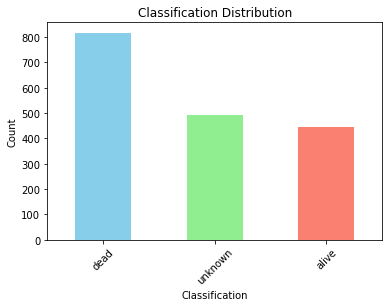

In [9]:
import matplotlib.pyplot as plt

classification_counts = results_df['Classification'].value_counts()
classification_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Classification Distribution')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Dead repos 

In [10]:
dead_repos_df = results_df[results_df['Classification'] == 'dead']


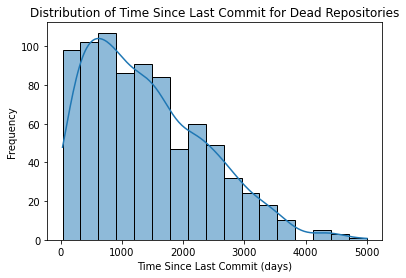

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of "Time Since Last Commit" for "dead" repositories
sns.histplot(dead_repos_df['TimeSinceLastCommit'], kde=True)
plt.title('Distribution of Time Since Last Commit for Dead Repositories')
plt.xlabel('Time Since Last Commit (days)')
plt.ylabel('Frequency')
plt.show()


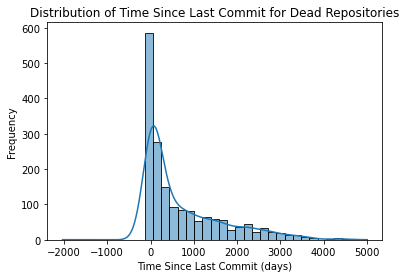

In [17]:
# Plotting the distribution of "Time Since Last Commit" for "dead" repositories
sns.histplot(results_df['TimeSinceLastCommit'], kde=True)
plt.title('Distribution of Time Since Last Commit for Dead Repositories')
plt.xlabel('Time Since Last Commit (days)')
plt.ylabel('Frequency')
plt.show()

#### Alive repos 

In [15]:
alive_repos_df = results_df[results_df['Classification'] == 'alive']


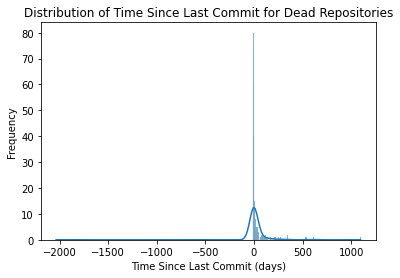

In [16]:
# Plotting the distribution of "Time Since Last Commit" for "dead" repositories
sns.histplot(alive_repos_df['TimeSinceLastCommit'], kde=True)
plt.title('Distribution of Time Since Last Commit for Dead Repositories')
plt.xlabel('Time Since Last Commit (days)')
plt.ylabel('Frequency')
plt.show()

#### Dead repos 

In [ ]:
dead_repos_df = results_df[results_df['Classification'] == 'dead']


In [ ]:
#### Dead repos 
dead_repos_df = results_df[results_df['Classification'] == 'dead']


In [25]:
import os
import pandas as pd

def process_commit_history(csv_file, current_time="2023-12-15"):
    df = pd.read_csv(csv_file)
    
    # Drop rows where 'date' is null to avoid NaT values
    df = df.dropna(subset=['date'])
    
    # If DataFrame is empty after dropping null dates, skip this file
    if df.empty:
        return None
    
    # Continue with preprocessing
    df['date'] = pd.to_datetime(df['date']).dt.tz_localize(None)
    df['timestamp'] = df['date'].astype('datetime64[s]')  # Safely convert to timestamps
    df = df.sort_values(by=['timestamp'], ascending=True)
    df['interval'] = df['timestamp'].diff().dt.total_seconds()
    
    # Calculate Z, Percentile_95, and T_X_n
    Z = df['interval'].max()
    percentile_95 = df['interval'].dropna().quantile(0.95)
    T = pd.to_datetime(current_time)
    T_X_n = (T - df['timestamp'].iloc[-1]).total_seconds()
    
    # Classify the repository
    classification = "unknown"  # Default classification
    if T_X_n > Z:
        classification = "dead"
    elif T_X_n < percentile_95:
        classification = "alive"
    
    repo_name = os.path.basename(csv_file).split('.')[0]  # Assuming file name is the repo name
    return {'Repo': repo_name, 'Z': Z, 'T_X_n': T_X_n, 'Percentile_95': percentile_95, 'Classification': classification}

# Adjust folder_path to your directory containing CSV files
folder_path = 'Data/CommitData'

results_df = pd.DataFrame(columns=['Repo', 'Z', 'T_X_n', 'Percentile_95', 'Classification'])

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        csv_path = os.path.join(folder_path, file_name)
        result = process_commit_history(csv_path)
        if result:  # Only append if result is not None
            results_df = results_df.append(result, ignore_index=True)

results_df

,Repo,Z,T_X_n,Percentile_95,Classification
0,C_0voice_campus_recruitmen_questions,1468386.0,72700753.0,5936.6,dead
1,C_0xAX_linux-insides,9252379.0,9027872.0,640366.95,unknown
2,C_1Danish-00_CompressorQueue,31220268.0,36743534.0,19001707.5,dead
3,C_2d-inc_developer_quest,6848421.0,125971488.0,86402.9,dead
4,C_350306878_Kuai-Shua-Questions,64032394.0,8440126.0,7525429.7,unknown
...,...,...,...,...,...
1747,C_zpao_qrcode,31729003.0,-772438.0,10217311.0,alive
1748,C_zqzess_rule_for_quantumultX,606525.0,-890907.0,604659.6,alive
1749,C_zs9024_quick_psd2ugui,58344447.0,56208455.0,10866602.25,unknown
1750,C_zxing_zxing,5990254.0,903057.0,606422.9,unknown


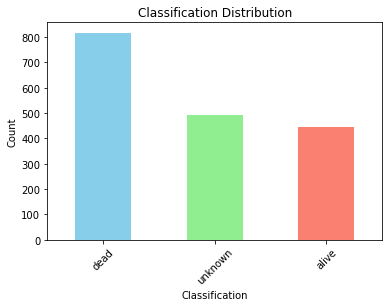

In [26]:
import matplotlib.pyplot as plt

classification_counts = results_df['Classification'].value_counts()
classification_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Classification Distribution')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()